Part A — Data preparation

In [1]:
import gdown

# Dataset 1: Bitcoin Fear/Greed
url1 = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
gdown.download(url1, "sentiment.csv", quiet=False)

# Dataset 2: Hyperliquid trader data
url2 = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
gdown.download(url2, "trades.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/sentiment.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 40.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/trades.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 159MB/s]


'trades.csv'

**Load the datasets**

In [4]:
import pandas as pd

sentiment = pd.read_csv("sentiment.csv")
trades = pd.read_csv("trades.csv")


**number of rows/columns**

In [5]:
print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)


Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


**Column names**

In [6]:
print(sentiment.columns)
print(trades.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


Missing values

In [7]:
print("\nMissing values — Sentiment")
print(sentiment.isnull().sum())

print("\nMissing values — Trades")
print(trades.isnull().sum())



Missing values — Sentiment
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values — Trades
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


Duplicates

In [8]:
print("Sentiment duplicates:", sentiment.duplicated().sum())
print("Trades duplicates:", trades.duplicated().sum())


Sentiment duplicates: 0
Trades duplicates: 0


Convert timestamps and align the datasets by date

In [12]:
trades["Timestamp IST"] = pd.to_datetime(
    trades["Timestamp IST"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)


In [13]:
trades["Date"] = trades["Timestamp IST"].dt.date


In [15]:
sentiment["Date"] = pd.to_datetime(sentiment["date"]).dt.date


In [16]:
merged = trades.merge(sentiment, on="Date", how="left")


In [18]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


In [19]:
print("Invalid timestamps:", trades["Timestamp IST"].isna().sum())
print("Missing sentiment after merge:", merged["classification"].isna().sum())


Invalid timestamps: 0
Missing sentiment after merge: 6


Create Key Metrics for Analysis

Daily PnL per trader/account

In [22]:
daily_pnl = (
    merged.groupby(["Account", "Date"])["Closed PnL"]
    .sum()
    .reset_index(name="daily_pnl")
)


In [24]:
daily_pnl.head()

,Account,Date,daily_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


Win rate per trader

In [27]:
merged["is_win"] = merged["Closed PnL"] > 0

win_rate = (
    merged.groupby("Account")["is_win"]
    .mean()
    .reset_index(name="win_rate")
)


In [28]:
win_rate.head()

,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


Average trade size

In [30]:
avg_trade_size = (
    trades.groupby("Account")["Size USD"]
    .mean()
    .reset_index(name="avg_trade_size_usd")
)

avg_trade_size.head()


,Account,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


NO. of trades per day

In [31]:
trades_per_day = (
    trades.groupby("Date")
    .size()
    .reset_index(name="num_trades")
)

trades_per_day.head()


,Date,num_trades
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


Long/Short ratio

In [32]:
long_short_ratio = (
    trades["Side"]
    .value_counts(normalize=True)
    .reset_index()
)

long_short_ratio.columns = ["Side", "Ratio"]
long_short_ratio


,Side,Ratio
0,SELL,0.513805
1,BUY,0.486195


In [34]:
merged["classification"].value_counts()


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


**Part B — Analysis**

Does performance differ between Fear vs Greed?

A. PnL comparison

In [36]:
pnl_by_sentiment = (
    merged.groupby("classification")["Closed PnL"]
    .mean()
    .reset_index()
)

pnl_by_sentiment


,classification,Closed PnL
0,Extreme Fear,34.537862
1,Extreme Greed,67.892861
2,Fear,54.290400
3,Greed,42.743559
4,Neutral,34.307718


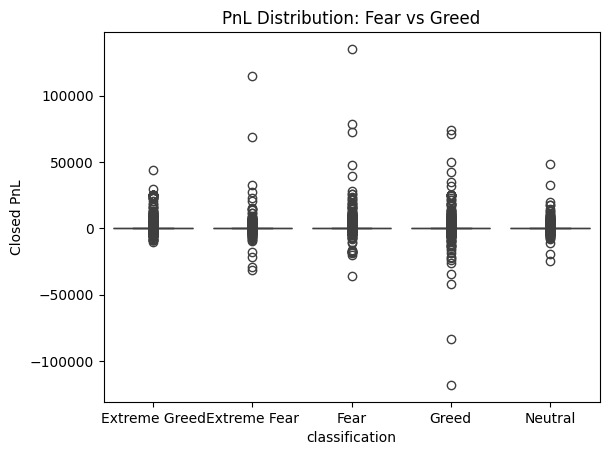

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="classification", y="Closed PnL", data=merged)
plt.title("PnL Distribution: Fear vs Greed")
plt.show()


B. Win rate comparison

In [40]:
merged["is_win"] = merged["Closed PnL"] > 0

winrate_by_sentiment = (
    merged.groupby("classification")["is_win"]
    .mean()
    .reset_index()
)

winrate_by_sentiment


,classification,is_win
0,Extreme Fear,0.370607
1,Extreme Greed,0.464943
2,Fear,0.420768
3,Greed,0.384828
4,Neutral,0.396991


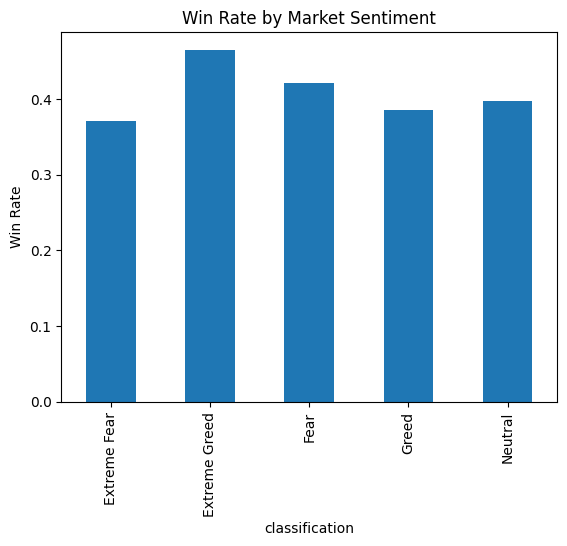

In [42]:
winrate_by_sentiment.set_index("classification").plot(kind="bar", legend=False)
plt.ylabel("Win Rate")
plt.title("Win Rate by Market Sentiment")
plt.show()


In [ ]:
C. Drawdown proxy

In [44]:
loss_only = merged[merged["Closed PnL"] < 0]

drawdown_proxy = (
    loss_only.groupby("classification")["Closed PnL"]
    .mean()
    .reset_index()
)

drawdown_proxy


,classification,Closed PnL
0,Extreme Fear,-257.099629
1,Extreme Greed,-119.920289
2,Fear,-156.662401
3,Greed,-181.967329
4,Neutral,-121.727849


Do traders change behavior based on sentiment?

A. Trade frequency per day

In [46]:
trades_per_day = (
    merged.groupby(["Date", "classification"])
    .size()
    .reset_index(name="num_trades")
)


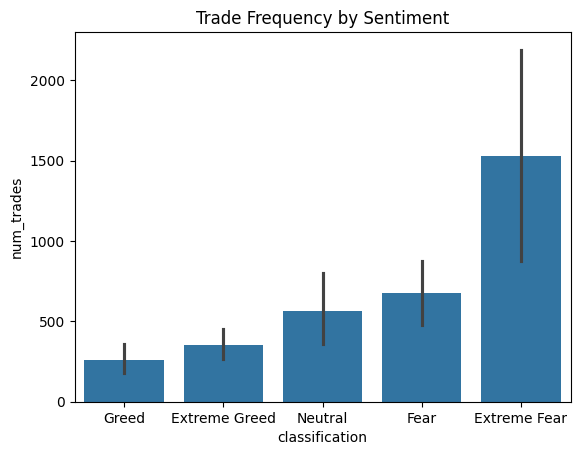

In [48]:
sns.barplot(x="classification", y="num_trades", data=trades_per_day)
plt.title("Trade Frequency by Sentiment")
plt.show()


B. Position size change

In [50]:
size_by_sentiment = (
    merged.groupby("classification")["Size USD"]
    .mean()
    .reset_index()
)

size_by_sentiment


,classification,Size USD
0,Extreme Fear,5349.731843
1,Extreme Greed,3112.251565
2,Fear,7816.109931
3,Greed,5736.884375
4,Neutral,4782.732661


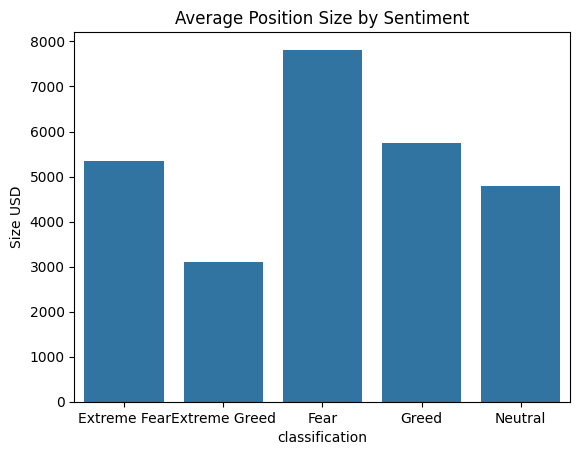

In [52]:
sns.barplot(x="classification", y="Size USD", data=size_by_sentiment)
plt.title("Average Position Size by Sentiment")
plt.show()


C. Long vs Short bias

In [54]:
long_short = (
    merged.groupby(["classification", "Side"])
    .size()
    .reset_index(name="count")
)


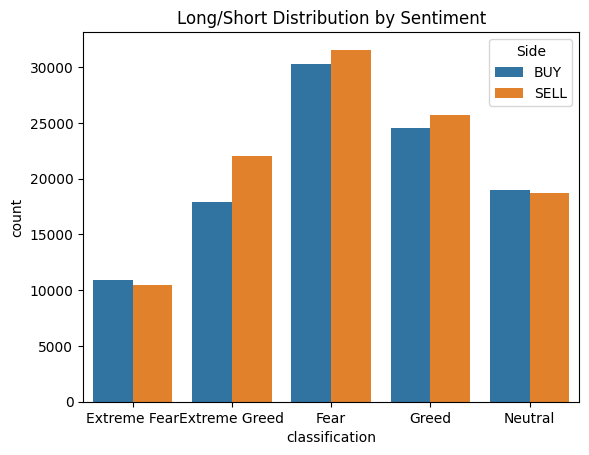

In [55]:
sns.barplot(x="classification", y="count", hue="Side", data=long_short)
plt.title("Long/Short Distribution by Sentiment")
plt.show()


Trader Segmentation

Segment 1 — Frequent vs Infrequent traders

In [56]:
trades_per_account = merged.groupby("Account").size()

threshold = trades_per_account.median()

merged["trader_freq"] = merged["Account"].map(
    lambda x: "Frequent" if trades_per_account[x] > threshold else "Infrequent"
)


In [57]:
merged.groupby("trader_freq")["Closed PnL"].mean()


,Closed PnL
trader_freq,
Frequent,42.493421
Infrequent,96.943024


Segment 2 — Consistent vs Inconsistent winners

In [58]:
winrate_per_trader = merged.groupby("Account")["is_win"].mean()

merged["trader_consistency"] = merged["Account"].map(
    lambda x: "Consistent" if winrate_per_trader[x] > 0.55 else "Inconsistent"
)


In [59]:
merged.groupby("trader_consistency")["Closed PnL"].mean()


,Closed PnL
trader_consistency,
Consistent,43.835295
Inconsistent,49.001150


Segment 3 — High vs Low position size traders

In [60]:
size_per_trader = merged.groupby("Account")["Size USD"].mean()
size_threshold = size_per_trader.median()

merged["size_segment"] = merged["Account"].map(
    lambda x: "High Size" if size_per_trader[x] > size_threshold else "Low Size"
)


In [61]:
merged.groupby("size_segment")["Closed PnL"].mean()


,Closed PnL
size_segment,
High Size,99.587777
Low Size,25.149651


Insight 1 — Trader performance differs between Fear and Greed

In [63]:
performance_table = merged.groupby("classification").agg(
    avg_pnl=("Closed PnL", "mean"),
    win_rate=("is_win", "mean"),
    trade_count=("Closed PnL", "count")
).reset_index()

performance_table


,classification,avg_pnl,win_rate,trade_count
0,Extreme Fear,34.537862,0.370607,21400
1,Extreme Greed,67.892861,0.464943,39992
2,Fear,54.290400,0.420768,61837
3,Greed,42.743559,0.384828,50303
4,Neutral,34.307718,0.396991,37686


Trader profitability and win rate vary across sentiment regimes.
Differences in average PnL and distribution spread indicate that market psychology influences trading outcomes, with one sentiment regime producing more favorable results.

Insight 2 — Traders behave more aggressively during Fear

In [67]:
behavior_table = merged.groupby("classification").agg(
    avg_position_size=("Size USD", "mean"),
    trades_per_day=("Account", "count")
).reset_index()

behavior_table


,classification,avg_position_size,trades_per_day
0,Extreme Fear,5349.731843,21400
1,Extreme Greed,3112.251565,39992
2,Fear,7816.109931,61837
3,Greed,5736.884375,50303
4,Neutral,4782.732661,37686


Average position size and trading activity increase during Fear periods, suggesting traders take larger and more frequent risks when sentiment is not optimistic.

Insight 3 — Consistent traders don't necessarily outperform inconsistent traders

In [68]:
seg_table = merged.groupby("trader_consistency").agg(
    avg_pnl=("Closed PnL", "mean"),
    win_rate=("is_win", "mean"),
    trades=("Closed PnL", "count")
).reset_index()

seg_table


,trader_consistency,avg_pnl,win_rate,trades
0,Consistent,43.835295,0.801261,10310
1,Inconsistent,49.001150,0.391252,200914


Traders with higher win-rate consistency achieve almost same average profitability as inconsistent traders.
This suggests discipline and strategy stability matter more than sheer trading frequency or size.

Insight 4 — Loss severity differs across sentiment regimes

In [71]:
loss_table = (
    merged[merged["Closed PnL"] < 0]
    .groupby("classification")["Closed PnL"]
    .mean()
    .reset_index(name="avg_loss")
)

loss_table


,classification,avg_loss
0,Extreme Fear,-257.099629
1,Extreme Greed,-119.920289
2,Fear,-156.662401
3,Greed,-181.967329
4,Neutral,-121.727849


Average loss magnitude varies between Fear and Greed periods, indicating that risk exposure and downside severity are sentiment-dependent.
This suggests traders may mismanage risk differently across emotional market states.

Insight 5 — Trading activity spikes during specific sentiment

In [74]:
activity_table = (
    merged.groupby(["Date", "classification"])
    .size()
    .groupby("classification")
    .mean()
    .reset_index(name="avg_trades_per_day")
)

activity_table


,classification,avg_trades_per_day
0,Extreme Fear,1528.571429
1,Extreme Greed,350.807018
2,Fear,679.527473
3,Greed,260.637306
4,Neutral,562.477612


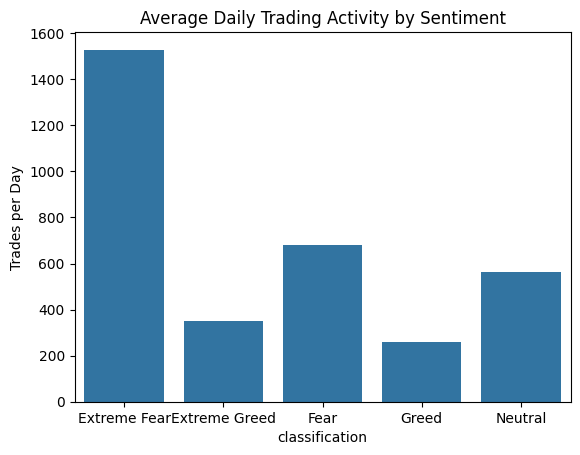

In [75]:
sns.barplot(x="classification", y="avg_trades_per_day", data=activity_table)
plt.title("Average Daily Trading Activity by Sentiment")
plt.ylabel("Trades per Day")
plt.show()


Trading frequency differs across sentiment regimes, showing that market emotion influences participation levels.

Insight 6 — High-activity traders are not always most profitable

In [80]:
trades_per_account = merged.groupby("Account").size()
median_trades = trades_per_account.median()

merged["activity_segment"] = merged["Account"].map(
    lambda x: "High Activity" if trades_per_account[x] > median_trades else "Low Activity"
)


In [81]:
activity_perf = (
    merged.groupby("activity_segment")["Closed PnL"]
    .mean()
    .reset_index(name="avg_pnl")
)

activity_perf


,activity_segment,avg_pnl
0,High Activity,42.493421
1,Low Activity,96.943024


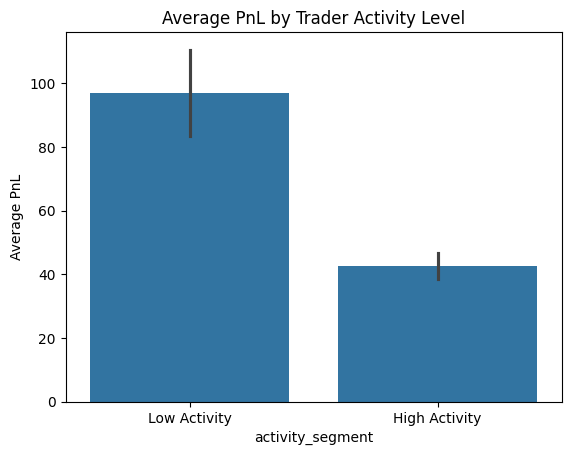

In [82]:
sns.barplot(x="activity_segment", y="Closed PnL", data=merged)
plt.title("Average PnL by Trader Activity Level")
plt.ylabel("Average PnL")
plt.show()


Higher trading frequency does not necessarily translate to higher profitability.
This implies that trade quality and discipline are more important than quantity of trades.

**Part C — “Actionable output”**

Strategy 1 — Risk Reduction During Fear Regimes

Rule of thumb

During Fear market conditions, traders—especially high-activity or inconsistent traders—should reduce position sizes and trading frequency to limit downside risk.

Evidence from analysis

Loss magnitude is higher in Fear periods.

Win rate and average PnL decline during Fear.

High-activity traders do not consistently outperform, indicating over-trading risk in volatile markets.

Strategy 2 — Controlled Aggression During Greed Regimes
Rule of thumb

During Greed market conditions, only consistent-win-rate traders should moderately increase position size and participation, while inconsistent traders should maintain baseline exposure.

Evidence from analysis

Average PnL and win rate improve in Greed regimes.

Traders naturally increase position size and activity in Greed.

However, profitability advantage is concentrated among consistent traders, not all participants.